In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import random
import numpy as np
import seaborn as sns
import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, f1_score, roc_curve, precision_recall_curve, auc, make_scorer
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


In [12]:
#load dataset into dataframe
def load_bank_data():
    file = "bank_full.csv"
    return pd.read_csv(file)

bank_initial_data = load_bank_data()

In [40]:
print(bank_initial_data["y"].value_counts())
print(bank_initial_data.shape)

False    39922
True      5289
Name: y, dtype: int64
(45211, 17)


In [13]:
bank_initial_data.shape
bank_initial_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
#Checking for null values
bank_initial_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

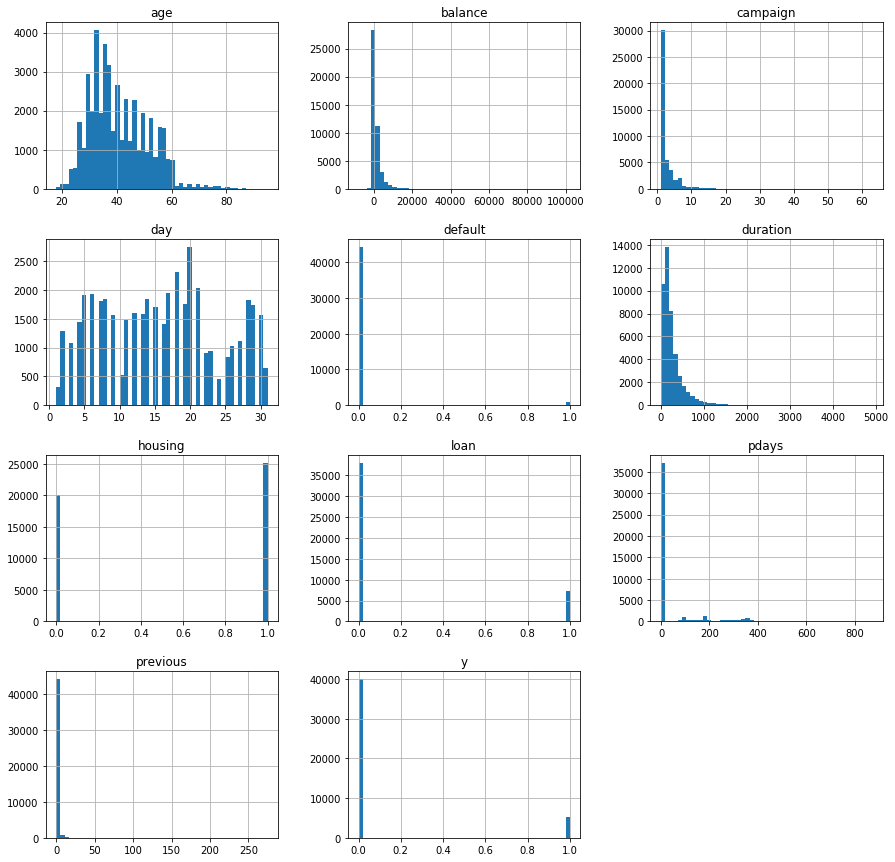

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
bank_initial_data.hist(bins=50,figsize=(15,15)) #Look at the histograms
plt.show()

In [16]:
#Feature Engineering

bank_data_minus_duration = bank_initial_data.drop(["duration"], axis=1) #Dropping "duration" variable

#Converting Boolean variables into numeric
bank_data_transformed = bank_data_minus_duration.copy()
bank_data_transformed["y"] = bank_data_transformed["y"].astype(int)
bank_data_transformed["default"] = bank_data_transformed["default"].astype(int)
bank_data_transformed["loan"] = bank_data_transformed["loan"].astype(int)
bank_data_transformed["housing"] = bank_data_transformed["housing"].astype(int)

#Converting ordinal categorical variables education and month into numeric values
replace_map_edu = {'education': {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 0}}
replace_map_month = {'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may' : 5, 'jun': 6, 
                               'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec': 12}}
bank_data_transformed.replace(replace_map_edu,inplace=True)
bank_data_transformed.replace(replace_map_month,inplace=True)

# Converting nominal categorical variables job, marital, contact, poutcome into numeric values
bank_data_transformed = pd.get_dummies(bank_data_transformed, columns=['job','marital','contact', 'poutcome'], drop_first=True)


In [17]:
#Splitting train and test data into 80:20 ratio, proportionate;y distributed by target variable
target = bank_data_transformed["y"]
train, test = train_test_split(bank_data_transformed, test_size=0.2, stratify=target)

#Check the distribution
print('y_train class distribution')
print(train["y"].value_counts(normalize=True))
print('y_test class distribution')
print(test["y"].value_counts(normalize=True))

y_train class distribution
0    0.883018
1    0.116982
Name: y, dtype: float64
y_test class distribution
0    0.883003
1    0.116997
Name: y, dtype: float64


In [18]:
#Splitting labels from train and test data

train_y = train["y"] 
train.drop(["y"], axis=1, inplace=True)

test_y = test["y"]
test.drop(["y"], axis=1, inplace=True)

C:\Users\archi\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
#Function to return Accuracy, precision, recall, confusion matric, f1_score of the decision tree model
def return_classifier_score(X, Y):
    accuracy = accuracy_score(X, Y)
    confusion_mat = confusion_matrix(X, Y)
    precision = precision_score(X, Y)
    recall = recall_score(X, Y)
    f1_sc = f1_score(X,Y)
    print("Accuracy=", accuracy, " Precision=", precision, " Recall=",recall, " F1_score=", f1_sc)
    print("Confusion Matrix: ",confusion_mat)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(X,Y)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC AUC =",roc_auc)
    #return accuracy, confusion_mat, precision, recall


In [205]:
#Create and train Decision Tree Classifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(train, train_y)
predictions = model_decision_tree.predict(train)
return_classifier_score(train_y, predictions)

Accuracy= 1.0  Precision= 1.0  Recall= 1.0  F1_score= 1.0
Confusion Matrix:  [[31937     0]
 [    0  4231]]
ROC AUC = 1.0


In [206]:
#Testing performance of initial Decision Tree Classifier on test set

predict_test = model_decision_tree.predict(test)
return_classifier_score(test_y, predict_test)

Accuracy= 0.8301448634302776  Precision= 0.29745762711864404  Recall= 0.33175803402646503  F1_score= 0.3136729222520107
Confusion Matrix:  [[7156  829]
 [ 707  351]]
ROC AUC = 0.6139691860802331


In [ ]:
dot_data = sklearn.tree.export_graphviz(model_decision_tree, feature_names = data_feature_names,
out_file=None)
graph = graphviz.Source(dot_data)
graph

In [207]:
#Using GridSearchCV function to find optimal depth for decision tree
parameters = {'max_depth':range(3,20), 'max_features':range(2,25)}
clf = GridSearchCV(model_decision_tree, parameters, n_jobs=4)
clf.fit(X=train, y=train_y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8924463614244637 {'max_depth': 3, 'max_features': 20}


In [208]:
#Creating new Decision Tree model with max_depth=3 as per GridSearchCV output
model_decision_tree_3 = DecisionTreeClassifier(max_depth=3, max_features=20)
model_decision_tree_3.fit(train, train_y)
predictions_3 = model_decision_tree_3.predict(train)
return_classifier_score(train_y, predictions_3)

Accuracy= 0.8930269851802699  Precision= 0.6993392070484582  Recall= 0.1500827227605767  F1_score= 0.24712979178828565
Confusion Matrix:  [[31664   273]
 [ 3596   635]]
ROC AUC = 0.5707673218649926


In [209]:
#Checking the performace of new improved model on test set
predictions_test = model_decision_tree_3.predict(test)
return_classifier_score(test_y, predictions_test)


Accuracy= 0.8930664602454937  Precision= 0.7096774193548387  Recall= 0.14555765595463138  F1_score= 0.24156862745098037
Confusion Matrix:  [[7922   63]
 [ 904  154]]
ROC AUC = 0.5688339312960383


In [20]:
#Using LDA to reduce dimensionality of data

train_lda = train.copy()
test_lda = test.copy()

lda = LinearDiscriminantAnalysis(n_components=2)
train_lda_transformed = lda.fit(train_lda, train_y).transform(train_lda)

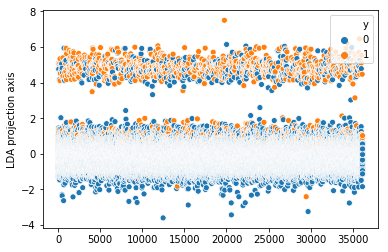

In [11]:
fig = sns.scatterplot(x=np.arange(np.size(train_lda_transformed)),y=train_lda_transformed[:,0],hue=train_y)
plt.ylabel('LDA projection axis')
plt.show(fig)

In [23]:
# Use LDA to predict train data
predictions_lda = lda.predict(train)
return_classifier_score(train_y, predictions_lda)


Accuracy= 0.8932758239327583  Precision= 0.651676206050695  Recall= 0.1883715433703616  F1_score= 0.29226255958929226
Confusion Matrix:  [[31511   426]
 [ 3434   797]]
ROC AUC = 0.5875163913426314


In [24]:
# Use LDA to predict test data
predictions_lda_test = lda.predict(test)
return_classifier_score(test_y, predictions_lda_test)

Accuracy= 0.8908548048214088  Precision= 0.621160409556314  Recall= 0.1720226843100189  F1_score= 0.2694300518134715
Confusion Matrix:  [[7874  111]
 [ 876  182]]
ROC AUC = 0.5790608099070446


In [28]:
#Create and train RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_y)
predict_clf = clf.predict(train)
return_classifier_score(train_y, predict_clf)

Accuracy= 0.9847102410971024  Precision= 0.9967585089141004  Recall= 0.8721342472228788  F1_score= 0.9302911887054077
Confusion Matrix:  [[31925    12]
 [  541  3690]]
ROC AUC = 0.9358792537426351


In [29]:
# Evaluating performance of RandomForestClassifier on test data
predict_clf_test = clf.predict(test)
return_classifier_score(test_y, predict_clf_test)

Accuracy= 0.8905230565077961  Precision= 0.5982658959537572  Recall= 0.1956521739130435  F1_score= 0.2948717948717949
Confusion Matrix:  [[7846  139]
 [ 851  207]]
ROC AUC = 0.5891222672946557


In [31]:
#Using GridSearchCV function to find optimal features for RandonForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf1 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 475.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 516.8min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [37]:
#Create and train optimal RandomForestClassifier
clf_optimized = RandomForestClassifier(n_jobs=2, n_estimators=400,min_samples_split=10, min_samples_leaf=4,max_features='auto',max_depth=70,bootstrap=True)
clf_optimized.fit(train, train_y)
predict_clf_opt = clf_optimized.predict(train)
return_classifier_score(train_y, predict_clf)

Accuracy= 0.9847102410971024  Precision= 0.9967585089141004  Recall= 0.8721342472228788  F1_score= 0.9302911887054077
Confusion Matrix:  [[31925    12]
 [  541  3690]]
ROC AUC = 0.9358792537426351


In [38]:
#Test new RandomForestClassifier model on test data
predict_clf_opt = clf_optimized.predict(test)
return_classifier_score(test_y, predict_clf_opt)

Accuracy= 0.8930664602454937  Precision= 0.6704119850187266  Recall= 0.16918714555765596  F1_score= 0.270188679245283
Confusion Matrix:  [[7897   88]
 [ 879  179]]
ROC AUC = 0.5790832409065675
